In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# custom functions
from functions import *

2024-11-18 22:54:52.477287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731966892.497150   33633 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731966892.502804   33633 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 22:54:52.520639: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1, random_state=314).reset_index(drop=True)

In [3]:
df

,name,url,title,lemmes,funny
0,la_depeche,https://www.ladepeche.fr/2024/09/29/145-person...,145 personnes ont donné leur sang en trois jours,personne donner sang jour,0
1,le_parisien,https://www.leparisien.fr/essonne-91/juvisy-su...,Juvisy-sur-Orge : il crache sur des policiers ...,juvisy-sur-orge cracher policier annoncer sero...,0
2,le_parisien,https://www.leparisien.fr/faits-divers/8-avril...,8 avril 1979 : le « tueur de l’Oise » arrêté...,avril tueur oise arrete assassin eter gendarme,0
3,la_depeche,https://www.ladepeche.fr/2024/10/09/grande-soi...,"Grande soirée théâtre, samedi 19",grand soiree theatre samedi,0
4,franceinfotv,https://www.francetvinfo.fr/les-jeux-olympique...,"Paris 2024 : près de 10 000 défilants, accès g...",paris defilant acces gratuit best of musical f...,0
...,...,...,...,...,...
106557,la_depeche,https://www.ladepeche.fr/2024/10/16/randonnee-...,Randonnée de la pleine lune,randonnee plein lune,0
106558,rfi,https://www.rfi.fr/fr/podcasts/la-marche-du-mo...,Tchad : quand les femmes prennent la voix du s...,tchad femme prendre voix syndicat,0
106559,rfi,https://www.rfi.fr/fr/podcasts/le-journal-d-ou...,Journal d'Outre-mer du 20 septembre 2024,journal outre-mer septembre,0
106560,le_parisien,https://www.leparisien.fr/val-de-marne-94/val-...,Val-de-Marne : le pont de Sucy-en-Brie rouvre ...,val-de-marne pont sucy-en-brie rouvrir circula...,0


In [4]:
X = CountVectorizer().fit_transform(df.lemmes)

In [5]:
X.shape

(106562, 48945)

In [6]:
X = CountVectorizer(min_df=50).fit_transform(df.lemmes)

In [7]:
X.shape

(106562, 2981)

In [8]:
X.toarray().shape

(106562, 2981)

In [9]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Figure size 800x600 with 0 Axes>

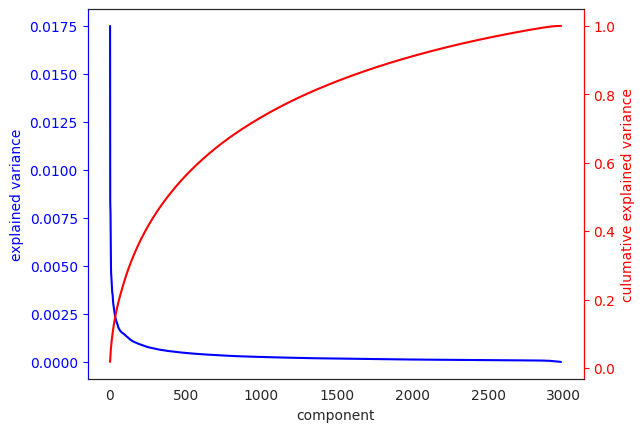

In [10]:
pca_graph(X.toarray())

In [11]:
y = df.funny

In [12]:
umap_embedding = umap.UMAP(n_components=2, n_jobs=-1, verbose=1, random_state=314).fit_transform(X)    

/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=314, verbose=1)
Mon Nov 18 22:57:31 2024 Construct fuzzy simplicial set
Mon Nov 18 22:57:31 2024 Finding Nearest Neighbors
Mon Nov 18 22:57:31 2024 Building RP forest with 21 trees
Mon Nov 18 22:58:21 2024 metric NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Mon Nov 18 22:59:14 2024 Finished Nearest Neighbor Search
Mon Nov 18 22:59:17 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Nov 18 23:01:50 2024 Finished embedding


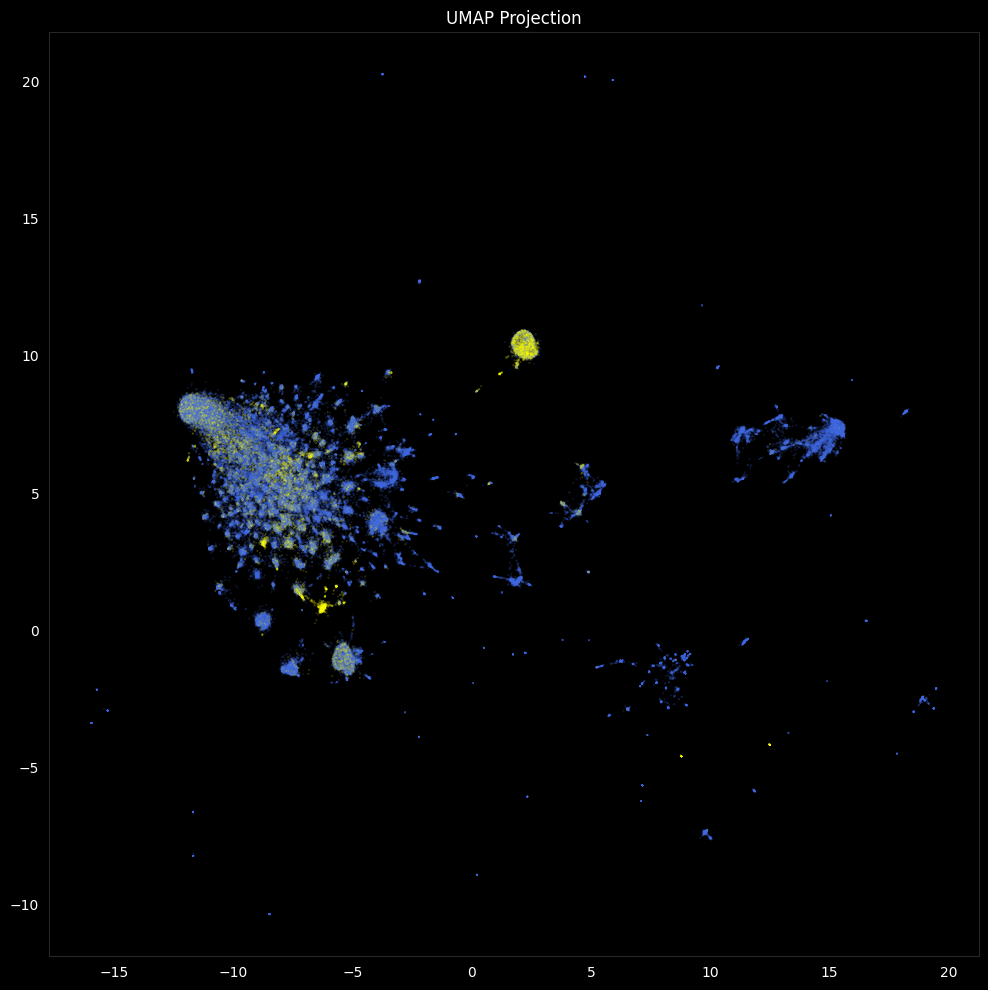

In [13]:
umap_graph(umap_embedding, y)